<h1 style="font-family:verdana;"> <center>🔍🎯 THE DEFINITIVE GUIDE TO SUCCESSFUL PREDICTION ⭐️🏠</center> </h1>

<h3>The dataset "California Housing Prices" contains information on housing in several districts in California. The goal of this project is to use machine learning techniques to train a predictive model that can estimate the median value of houses in California with a high degree of accuracy. The ability to predict house prices can be valuable for a variety of applications, such as real estate decision making, urban planning, and financial risk assessment.</h3>

<h3>What is the information?</h3>
<hr style="border: none; border-top: 3px solid #000000; margin: 1em 0;">
<li>Well first we have the geographical representation of each district which are the "longitude" and "latitude".</li>
<li>Then we have "housing_media_age" which represents the average age of the housing units in the California district.</li>
<li>"total_rooms" which are the total number of rooms in the houses in each district.</li>
<li>"total_bedrooms" This is the total number of bedrooms among the houses in the district.</li>
<li>"population" represents the population found in each district.</li>
<li>We have "HouseHolds" which is the total number of houses in each district.</li>
<li>"median_income" represents the median income of households in each district.</li>
<li>"median_house_value" which is going to be our target in this project, is the one that represents the median value of the houses in the district.</li>
<li>"ocean_proximity" represents the proximity of the district to the ocean.</li>
<hr style="border: none; border-top: 3px solid #000000; margin: 1em 0;">



<h3>The first thing we are going to do is to import the libraries we need to successfully carry out this project, I categorized them in three parts for better understanding for all of you.</h3>
<hr style="border: none; border-top: 3px solid #000000; margin: 1em 0;">
<li>Data Wrangling</li>
<li>EDA</li>
<li>Modeling</li>
<hr style="border: none; border-top: 3px solid #000000; margin: 1em 0;">

<h3>Libraries that i will use to do Data Wrangling.</h3>

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

<h3>Libraries that i will use to make EDA.</h3>

In [3]:
!pip install folium
from matplotlib import pyplot as plt
import seaborn as sns
import folium
import webbrowser
from folium.plugins import HeatMap

Defaulting to user installation because normal site-packages is not writeable


<h3>Libraries that i will use to do Modeling.</h3>

In [4]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from plotly.subplots import make_subplots
import plotly.graph_objs as go

Defaulting to user installation because normal site-packages is not writeable


<h3>Open the database saved in a csv file.</h3>

In [5]:
df = pd.read_csv('housing.csv')

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<a id='importing'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>DATA WRANGLING</div></b>

<h3>With this function we can see the columns, the type of data and if they contain any nulls.</h3>

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<h3>Checking the exact number of nulls</h3>

In [8]:
df.isnull().sum() 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<h3>As the database has 207 null data in the variable "total_bedrooms" I am going to complete it with the median of this variable.</h3>

In [9]:
#Here we obtain the median
completar_bedrooms = df['total_bedrooms'].median()
completar_bedrooms

435.0

<h3>With the following line of code finish inserting the nulls and with the "inplace=true" i update the database with the new changes</h3>

In [10]:
df['total_bedrooms'].fillna(completar_bedrooms, inplace=True) 

<h3>Check for duplicate or repeated results</h3>

In [11]:
print(df.duplicated().sum())

0


<h3>I will proceed to divide the California districts into 6 parts, for a better understanding of patterns and trends.</h3>

In [12]:
coords = df[['latitude', 'longitude']]

kmeans = KMeans(n_clusters=6)
kmeans.fit(coords)

df['districts'] = kmeans.labels_

<h3>Let's see how it was distributed, in the EDA phase it can be better appreciated.</h3>

In [13]:
df['districts'].value_counts()

2    8899
1    4826
5    2324
3    2158
0    1744
4     689
Name: districts, dtype: int64

<h3>I want you to see how many variables the "ocean_proximity" column has.</h3>

In [14]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<h3>In my opinion "ocean_proximity" is an interesting variable to analyze, so let's make it numeric by using the get_dummies method.</h3>
<hr style="border: none; border-top: 3px solid #000000; margin: 1em 0;">
<li>The modeling process will use the database called "df2" with the results of "get_dummies".</li>
&nbsp
<li>For the "EDA" process, I find it easier to visualize using the database "df" without get_dummies.</li>

In [15]:
df2 = df.join(pd.get_dummies(df.ocean_proximity)).drop(['ocean_proximity'], axis=1)
df2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,districts,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1,0,0,0,1,0


<a id='importing'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>EDA</div></b>

<h3>Here we can easily see the correlation between variables in this data set.</h3>
<hr style="border: none; border-top: 3px solid #000000; margin: 1em 0;">

> The dark blue ones are the most highly correlated.

<AxesSubplot:>

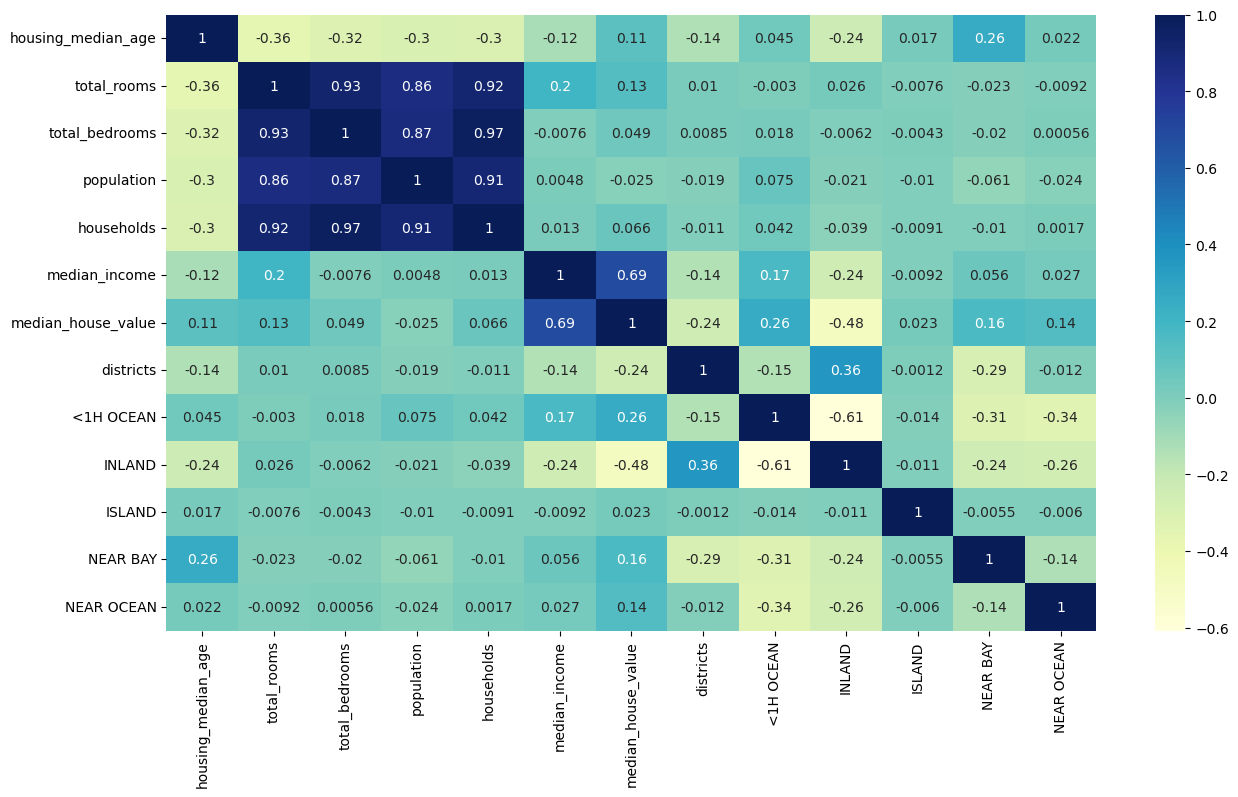

In [16]:
df_without_coords = df2.drop(['latitude', 'longitude'], axis=1)
plt.figure(figsize=(15, 8))
sns.heatmap(df_without_coords.corr(), annot=True, cmap="YlGnBu")

<h3>Next, we can see a heat map with the correlations between variables of the dataset, in this case I took out the variables that do not provide us with logical information such as the coordinates in this case.</h3>
<hr style="border: none; border-top: 3px solid #000000; margin: 1em 0;">
<li>If we look at the highest correlations of our predictor variable which is "median_house_value" we see that it is highly correlated with median income ("median_income") This can be explained because the ability to afford a house is largely determined by the income of a household, basically households with higher incomes can afford more expensive houses than households with lower incomes.</li> 
&nbsp
<li>Following the correlation map we continue with the "ocean_proximity" variables. Now can you understand why i used get_dummies? These variables are, less than one hour from the ocean ("<1H OCEAN"), Near the bay ("NEAR BAY"), Near the ocean ("NEAR OCEAN") suggesting that the closer the houses are to the ocean increase their mean value. Now the remaining variables have weaker correlations with the mean value of the house, being the "population" the one that represents one of the weakest correlations. Let us observe that "INLAND" has a negative correlation of -0.48. What can be understood from this result? It can be understood that houses that are located within California tend to have a lower median home price than others and this increases my hypothesis that the closer to the sea the house is, the more it is priced.</li>


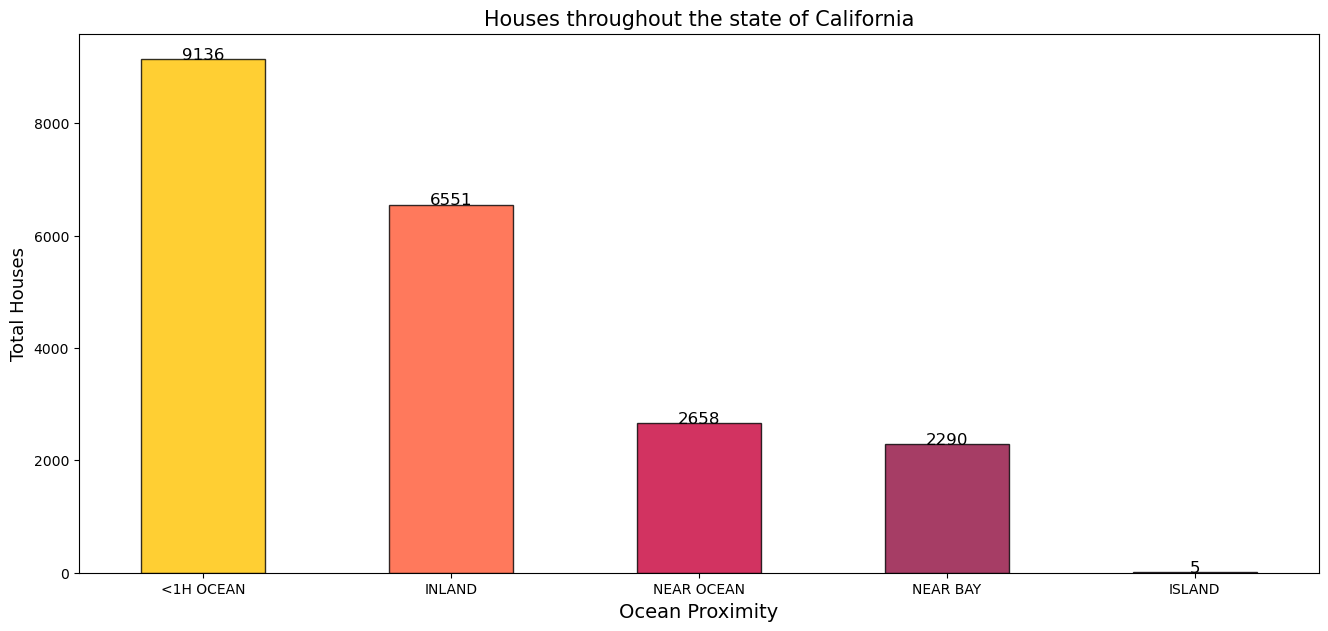

In [17]:
colors = ['#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845']

plt.figure(figsize=(16,7))
ax = df['ocean_proximity'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.8, color=colors)

labels = df['ocean_proximity'].value_counts().values
for i, label in enumerate(labels):
    ax.text(i, label, str(label), ha='center', fontsize=12)

plt.xlabel("Ocean Proximity", fontsize=14)
plt.ylabel("Total Houses", fontsize=13)

plt.xticks(rotation=0)

plt.title("Houses throughout the state of California", fontsize=15)


plt.show()

<h3>Proximity to the ocean is an important factor in the distribution of homes throughout California.</h3>
<hr style="border: none; border-top: 3px solid #000000; margin: 1em 0;">

<li>Thanks to this graph we can appreciate the frequency of houses around all the districts of California with the majority (9,136) located less than an hour from the ocean. The next largest group is in inland California, with 6,551 homes. This suggests that the coast is a desirable location and there is greater demand for houses in this area.
</li>

Text(0.5, 1.0, 'Median House Value vs Ocean Proximity')

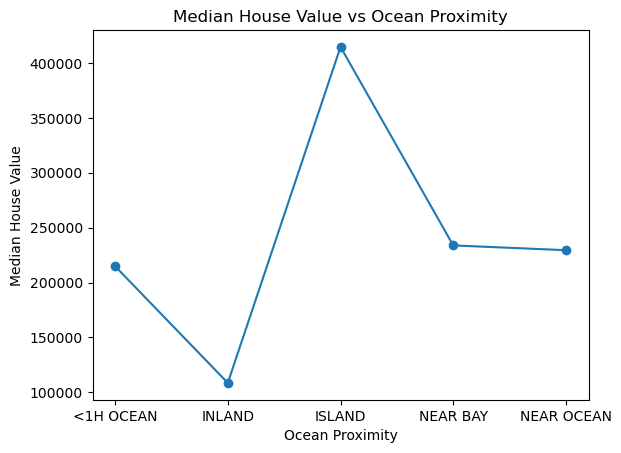

In [18]:
median_values = df.groupby("ocean_proximity")['median_house_value'].median()

plt.plot(median_values.index, median_values.values, marker='o')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.title('Median House Value vs Ocean Proximity')

<h3>Based on this graph, I can draw 2 main conclusions:</h3>
<hr style="border: none; border-top: 3px solid #000000; margin: 1em 0;">
<li>The apparent peak seen in the variable "ISLAND" is due to the fact that it only has 5 records, therefore it is biased and should not be taken into account..</li>
&nbsp
<li>The second conclusion is that the closer the house is to the ocean, the higher the probability of a high average price, let's observe that the variable "INLAND" has a collapse in the value of the house, with the other graphs I have, it can be better appreciated.</li>

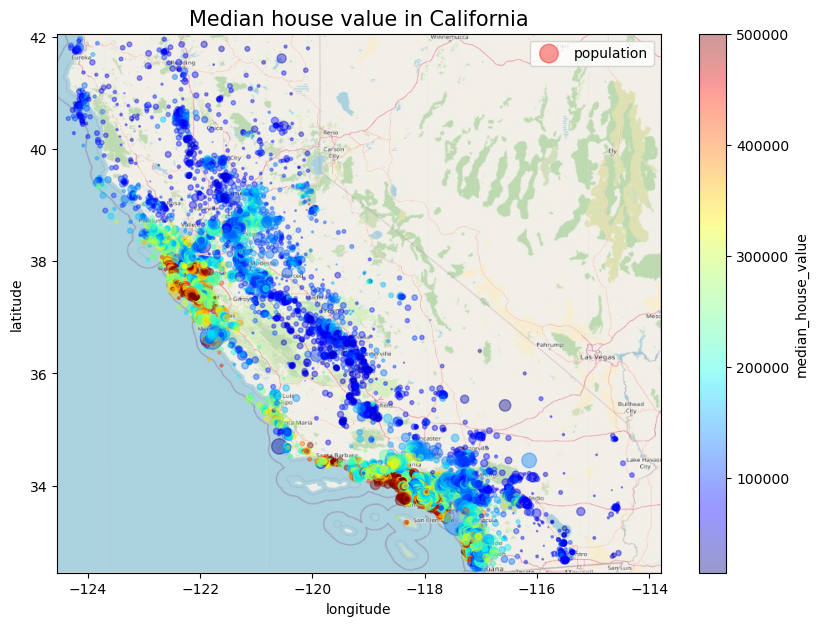

In [19]:
california_img = plt.imread('SFM.png')

df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
        s=df['population']/100, label='population', figsize=(10,7),
        c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=1)
plt.title('Median house value in California',fontsize=15)
plt.legend() 
plt.show()

<h3>From the above graph we can analyze the following:</h3>
<hr style="border: none; border-top: 3px solid #000000; margin: 1em 0;">
<li>First let's see that on the right side I have a color bar indicating the "median_house_value" representing with cold colors a low median house value and with warm colors I represent a high median house value, once this is said, as you can see in the graph, I can conclude that the closer the house is to the ocean, there are more possibilities that its median value increases significantly compared to those that are far away from the ocean. The size of the circles represents the population density, this means that the smaller the circle the less population density there is, the larger the circle the more population density there is in the district.</li>
&nbsp
<li>The majority of low priced homes are located in the interior ("INLAND") of the state of California and this may be an important factor and the reason why it ranks second in the number of total homes. Although if we observe well if we go to the north of California is indifferent the price of homes in any location, this can be explained with the popularity of the district, in the following graph we can visualize these districts better.</li>

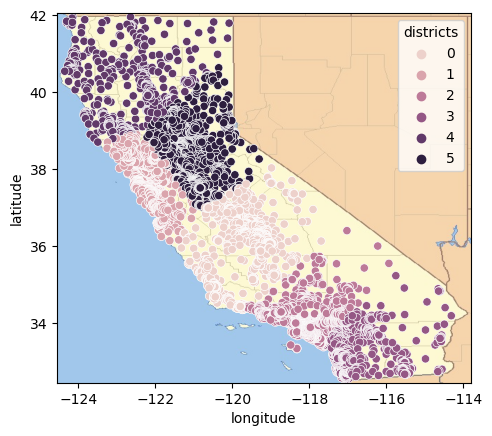

In [20]:
california_img = plt.imread('CA.png')
sns.scatterplot(x='longitude', y='latitude', hue='districts', data=df)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=1)

<h3>With this map we can appreciate the six districts in which the state of california is distributed, represented each one by colors that are located at the top right of the image.</h3>
<hr style="border: none; border-top: 3px solid #000000; margin: 1em 0;">
<li>We can observe that districts 0, 1 and 5 are the ones that represent more population density over the others, this has a strong relation with the price of the houses, if we go back to the previous graph we can see that these 3 districts contain the most expensive houses of all California, giving answer to why in some districts in spite of the fact that the houses are on the coast it is not so expensive compared to the 3 previous districts analyzed.</li>


In [21]:
map_ca = folium.Map(location=[36.7783,-119.4179],
                    zoom_start = 6, min_zoom=5) 

df1 = df[['latitude', 'longitude']]
data = [[row['latitude'],row['longitude']] for index, row in df1.iterrows()]
HeatMap(data, radius=10).add_to(map_ca)
map_ca

<h3>From the heat map I have just plotted, the information can be summarized as follows:</h3>
<hr style="border: none; border-top: 3px solid #000000; margin: 1em 0;">

<li>This heat map above allows us to visualize the population density around the state of California, with cool colors being those with lower population presence and warm colors (e.g., reds, oranges) representing a high density of population located in the district.</li>
&nbsp
<li>We see that all these graphs that I have made correlate with each other, previously we did an analysis of the most populated districts and here we confirm the foregoing.</li>
<hr style="border: none; border-top: 3px solid #000000; margin: 1em 0;">
<h3>Overall. All of these graphs are a useful tool for exploring, understanding patterns and trends in geographically-coordinated data throughout California.</h3>


<a id='importing'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>MODELING</div></b>

<h3>Step by step I will explain what I am doing to predict the variable "median_house_value".</h3>
<hr style="border: none; border-top: 3px solid #000000; margin: 1em 0;">

> Step 1: I divide the information in 2, being "X" all the variables of the dataframe except the variable to predict and "y" will be exclusive of the variable I want to predict, in this case it is "median_house_value".

> Step 2: Rename some columns to avoid problems in our process.


> Step 3: I separate the dataset into 80% for training, and 20% for testing. This is very important because with the 80% we are going to train our model and at the end we make a comparison of house prices with the 20% for testing.


> Step 4: I grouped the most used models in modeling and integrated a loop to know which one is the most convenient in my process.

In [22]:
# Step 1
X = df2.drop('median_house_value', axis=1)  
y = df2['median_house_value'] 

# Step 2
X.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in X.columns]

# Step 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 4: Select and evaluate multiple models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'K-Neighbors': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor()
}

best_model = None
best_r2 = -float('inf')

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} R-squared: {r2}")
    if r2 > best_r2:
        best_model = model_name
        best_r2 = r2

print(f"The best model: {best_model}")

Linear Regression R-squared: 0.638574423061871
Ridge Regression R-squared: 0.6385616202667515
Decision Tree R-squared: 0.6398179495379339
K-Neighbors R-squared: 0.23997551302095244
Random Forest R-squared: 0.8242611415510217
XGBoost R-squared: 0.8344412043601639
The best model: XGBoost


> Step 5: I add parameters and then I will evaluate it to give us a higher R^2.

> Step 6: I choose the winner model.

In [23]:
# Step 5
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2]
}
# Step 6
model = XGBRegressor()

> Step 7: I do an exhaustive hyperparameter search using cross-validation and then fit the model with each hyperparameter combination.

In [24]:
#Step 7
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estim

> Step 8: I assign the best model found during the hyperparameter search to the object and save it with the name "best_model".

In [25]:
# Step 8
best_model = grid_search.best_estimator_
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

> Step 9: Once I have found the best parameters, now I evaluate the whole model and print them.

In [26]:
# Step 9
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = best_model.score(X_test, y_test)

In [27]:
print("Best parameters:", grid_search.best_params_)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Best parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Mean Squared Error: 1990362481.1998334
Root Mean Squared Error: 44613.47869422237
Mean Absolute Error: 29676.48575751726
R-squared: 0.8473595614643921


<h3>Once the best evaluations of the model have been found, two main results can be highlighted:</h3>
<hr style="border: none; border-top: 3px solid #000000; margin: 1em 0;">
<ul>
    <li><p>We see the R-squared increased, not too much but those small changes make a difference.</p> </li>
    <li><p>We have a final prediction error of &#36;44,695. This indicates the deviation that my prediction model has compared to the original values, I have to clarify that this result is the lowest that can be obtained since we evaluated it with the best possible parameters.</p> </li>
    <li><p>Let's see with the following graphs and with the final result if this deviation is performing well or poorly.</p> </li>
</ul>

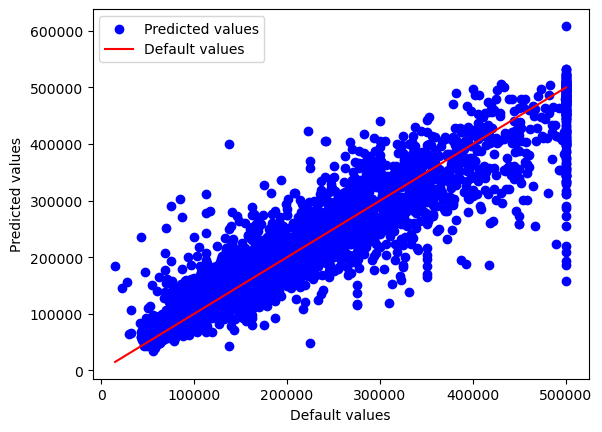

In [28]:
plt.scatter(y_test, y_pred, color='b', label='Predicted values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', label='Default values')
plt.xlabel('Default values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()

<h3>Scatter plot with diagonal line, in this graph we can see two main situations</h3>
<hr style="border: none; border-top: 3px solid #000000; margin: 1em 0;">
<li>The blue dots and the red diagonal line, what do they represent? The blue dots represent our predicted model and the red line represents the original values of our "median_house_value" variable.</li>
&nbsp
<li>If the blue dots are very scattered from the line, it means that they are not close to the original value at all, in our case we see that our blue dots are clustered near the diagonal, this means that it possibly gives us a very close prediction.</li>

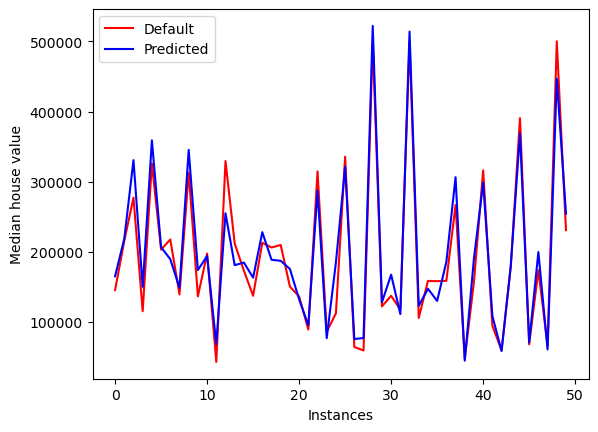

In [29]:
sample_size = 50  #Instances
indices = np.random.choice(len(y_test), sample_size, replace=False)
plt.plot(np.arange(sample_size), y_test.iloc[indices], color='r', label='Default')
plt.plot(np.arange(sample_size), y_pred[indices], color='b', label='Predicted')
plt.xlabel('Instances')
plt.ylabel('Median house value')
plt.legend()
plt.show()

<h3>What I have just plotted is a line diagram:</h3>
<hr style="border: none; border-top: 3px solid #000000; margin: 1em 0;">
<li>The red line on the graph represents the unpredicted values.</li>
&nbsp
<li>The blue line represents the predicted values of our variable "average value of the houses".
Comparing both lines, visually we can see a good performance of the model as they are very close meaning that they are close to the real values.</li>            

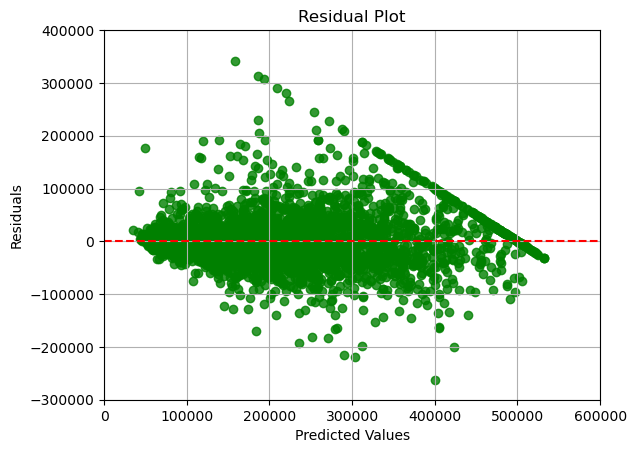

In [30]:
residuals = np.array(y_test) - np.array(y_pred)
plt.scatter(y_pred, residuals, color='g', alpha=0.8)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.xlim(0, 600000)
plt.ylim(-300000, 400000)
plt.show()


<h3>Residual plot</h3>
<hr style="border: none; border-top: 3px solid #000000; margin: 1em 0;">
<li>With the residual plot we can observe the difference between the original values and the predicted values. In this case we can see that both the points above and below 0 are practically the same, which indicates that the prediction model is very close to the original values, in the final graph/dataframe we will see if this is true.</li>

<h3>Finally, I make a dataframe that allows us to visualize the predictions made and compare them with the original values.</h3>

In [31]:
output = pd.DataFrame({'Original values':y_test,"Predicted Values":y_pred})

In [32]:
data = {
    'Original values': y_test,
    'Predicted Values': y_pred
}

finaldf = pd.DataFrame(data)

finaldf = finaldf.head(15)

styled_df = finaldf.style.background_gradient(cmap='viridis').set_properties(**{'max-height': '200px', 'font-size': '12pt'})

html = styled_df.to_html()

display(HTML(html))

,Original values,Predicted Values
14740,136900.000000,134663.421875
10101,241300.000000,235993.203125
20566,200700.000000,173959.515625
2670,72500.000000,68753.820312
15709,460000.000000,381457.000000
439,120000.000000,135040.468750
845,247000.000000,249818.515625
3768,336900.000000,379079.593750
964,339700.000000,300371.343750
8681,265600.000000,262038.046875


<h3>Final result</h3>
<hr style="border: none; border-top: 3px solid #000000; margin: 1em 0;">
<li>Comparing the trained values with the test values we can see that my model gave me very good results, not perfect, but very close to the original value, this means that my modeling was successful.</li>

<footer>
  <div class="copyright">
    <p>&copy; 2023 Pipe8424. All rights reserved.</p>
  </div>
</footer>
